In [33]:
import numpy as np
import matplotlib.pyplot as plt

## 3.1 The Data

In [34]:
data, flux = np.loadtxt("comp_proj_data.csv", skiprows = 1, delimiter = ',', unpack = True)


In [35]:
energy = np.arange(0, 10, 0.05)
energy_midpoints = np.arange(0.025,10,0.05)
print(energy_midpoints)
print(len(energy_midpoints))

[0.025 0.075 0.125 0.175 0.225 0.275 0.325 0.375 0.425 0.475 0.525 0.575
 0.625 0.675 0.725 0.775 0.825 0.875 0.925 0.975 1.025 1.075 1.125 1.175
 1.225 1.275 1.325 1.375 1.425 1.475 1.525 1.575 1.625 1.675 1.725 1.775
 1.825 1.875 1.925 1.975 2.025 2.075 2.125 2.175 2.225 2.275 2.325 2.375
 2.425 2.475 2.525 2.575 2.625 2.675 2.725 2.775 2.825 2.875 2.925 2.975
 3.025 3.075 3.125 3.175 3.225 3.275 3.325 3.375 3.425 3.475 3.525 3.575
 3.625 3.675 3.725 3.775 3.825 3.875 3.925 3.975 4.025 4.075 4.125 4.175
 4.225 4.275 4.325 4.375 4.425 4.475 4.525 4.575 4.625 4.675 4.725 4.775
 4.825 4.875 4.925 4.975 5.025 5.075 5.125 5.175 5.225 5.275 5.325 5.375
 5.425 5.475 5.525 5.575 5.625 5.675 5.725 5.775 5.825 5.875 5.925 5.975
 6.025 6.075 6.125 6.175 6.225 6.275 6.325 6.375 6.425 6.475 6.525 6.575
 6.625 6.675 6.725 6.775 6.825 6.875 6.925 6.975 7.025 7.075 7.125 7.175
 7.225 7.275 7.325 7.375 7.425 7.475 7.525 7.575 7.625 7.675 7.725 7.775
 7.825 7.875 7.925 7.975 8.025 8.075 8.125 8.175 8.

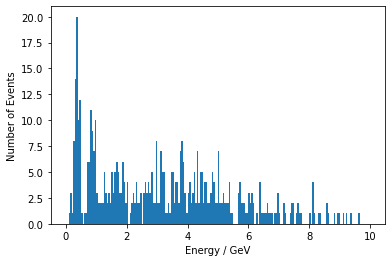

In [36]:
#%matplotlib tk 

plt.bar(energy_midpoints, data, 0.05)
plt.ylabel('Number of Events')
plt.xlabel('Energy / GeV')
plt.show()


## 3.2 Fit Function

In [37]:
def oscillation_probability(energy, theta_23 = np.pi/4, delta_m2_23 = 2.3e-3, L = 295):
  left = (np.sin(2 * theta_23)) ** 2
  right = (np.sin((1.267 * delta_m2_23 * L) / energy)) ** 2
  return 1 - (left * right)


In [38]:
def plot_oscillation_probability(energy, n = 4, delta_m = 2.4e-3):
  plt.plot(energy,oscillation_probability(energy_midpoints, theta_23= np.pi / n, delta_m2_23= delta_m),'black')
  plt.ylabel('Probability')
  plt.xlabel('Energy / GeV')
  #plt.title('Parameters theta = pi / ' + str(n) + ' and delta_m= ' + str(delta_m))

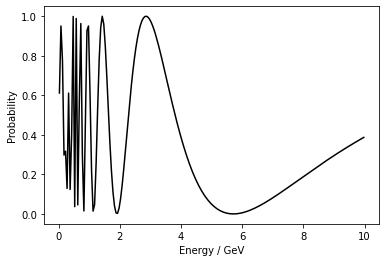

In [39]:
plot_oscillation_probability(energy_midpoints, 4, 2.4e-2)
plt.savefig('prob.png',dpi=200)
plt.show()

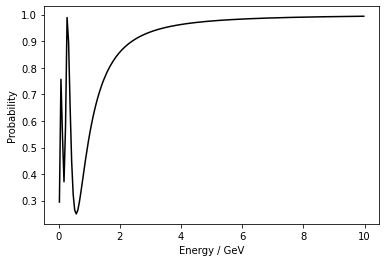

In [40]:
plot_oscillation_probability(energy_midpoints, n = 6, delta_m = 2.4e-3)

as n (pi / n) increases amplitude decreases and as delta_m decreases frequency increases

## flux x prob

In [41]:
def event_prediction(energy_midpoints, n = 4, delta_m = 2.4e-3, plot = False):
  probability_times_simulated = oscillation_probability(energy_midpoints, theta_23= np.pi * n, delta_m2_23= delta_m) * flux
  if plot == True:  
    plt.bar(energy_midpoints, probability_times_simulated, 0.05)
    plt.ylabel('Event rate prediction')
    plt.xlabel('Energy / GeV')
    plt.title('theta_n = ' + str(n) + ' delta_m = ' + str(delta_m))
    plt.show()
  return probability_times_simulated

In [93]:
def event_prediction_but_no_n(energy_midpoints, n = np.pi/4, delta_m = 2.4e-3, plot = False):
  probability_times_simulated = oscillation_probability(energy_midpoints, theta_23 = n, delta_m2_23= delta_m) * flux
  if plot == True:  
    plt.bar(energy_midpoints, probability_times_simulated, 0.05)
    plt.ylabel('Event rate prediction')
    plt.xlabel('Energy / GeV')
    plt.title('theta_n = ' + str(n) + ' delta_m = ' + str(delta_m))
    plt.show()
  return probability_times_simulated

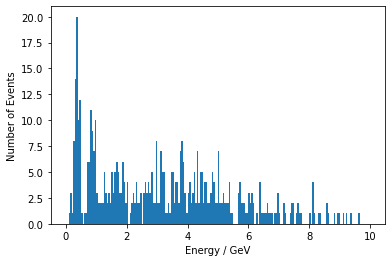

In [42]:
plt.bar(energy_midpoints, data, 0.05)
plt.ylabel('Number of Events')
plt.xlabel('Energy / GeV')
plt.show()

In [43]:
event_prediction(energy_midpoints,1/4.5,2.1e-3)

array([1.21392643e+00, 1.56379954e+00, 1.17719786e+01, 1.45747348e+00,
       2.41670371e+01, 3.51335531e+01, 2.92893701e+01, 1.76264216e+01,
       8.17888310e+00, 3.56896564e+00, 4.31494366e+00, 1.02971292e+01,
       1.88219893e+01, 2.40572768e+01, 2.43706849e+01, 2.22422013e+01,
       1.94941371e+01, 1.60962156e+01, 1.20211403e+01, 8.74889190e+00,
       6.51616923e+00, 5.27965250e+00, 4.58320694e+00, 3.90489215e+00,
       3.42423565e+00, 3.14961765e+00, 2.83978556e+00, 2.51694678e+00,
       2.39076606e+00, 2.10786583e+00, 1.99713020e+00, 1.86131029e+00,
       1.72158532e+00, 1.60401924e+00, 1.56325319e+00, 1.44484705e+00,
       1.37175403e+00, 1.31178835e+00, 1.29102501e+00, 1.20737607e+00,
       1.19259536e+00, 1.11004134e+00, 1.05441173e+00, 1.02558239e+00,
       1.02391364e+00, 9.99185934e-01, 9.59624146e-01, 9.05889181e-01,
       9.06048524e-01, 8.90016930e-01, 9.13841956e-01, 8.54773148e-01,
       8.51915660e-01, 8.66665254e-01, 8.62920226e-01, 8.24815034e-01,
      

## 3.3 Likelihood Function

In [44]:
# this can be used regardless of theta or m i think
def likelihood_function(lambda_i, observed_number_i):
  sum = 0
  for n in range(0, len(lambda_i)):
    #print(n)
    one_term = lambda_i[n] - (observed_number_i[n] * np.log(lambda_i[n])) + (np.log(np.math.factorial(int(observed_number_i[n]))))
    sum += one_term
    #print(one_term)
  return sum

In [45]:
def plot_NLL_for_theta(energy_midpoints, data,m23 = 2.4e-3, start_point=0, end_point = 2, interval = 0.01):
  n_thetas = np.arange(start_point,end_point, interval)
  NLL = []

  for n in n_thetas:
    expected_number_of_events = event_prediction(energy_midpoints,n,m23)
    NLL.append(likelihood_function(expected_number_of_events,data))

  plt.ylabel('NLL')
  plt.xlabel('n * theta')
  plt.plot(n_thetas,NLL,'x')
  return NLL, n_thetas

([1486.7359242435334,
  1483.0196315379085,
  1471.935179768928,
  1453.6747906453777,
  1428.5553236927788,
  1397.013061417988,
  1359.5965071429132,
  1316.9572900665478,
  1269.8392930977452,
  1219.066134958528,
  1165.5271472071636,
  1110.1619868203202,
  1053.9440126053032,
  997.8625245620343,
  942.9039132720666,
  890.0316832882776,
  840.1651903716864,
  794.1567583312931,
  752.7666203081016,
  716.6349117970365,
  686.2499182365159,
  661.9124415635534,
  643.6981455763087,
  631.4212734660886,
  624.5975594779986,
  622.4770339941402,
  624.5975594779986,
  631.4212734660886,
  643.6981455763087,
  661.9124415635533,
  686.2499182365157,
  716.6349117970365,
  752.7666203081018,
  794.1567583312933,
  840.1651903716867,
  890.0316832882775,
  942.9039132720666,
  997.8625245620343,
  1053.9440126053028,
  1110.16198682032,
  1165.5271472071634,
  1219.066134958528,
  1269.8392930977452,
  1316.9572900665476,
  1359.5965071429127,
  1397.013061417988,
  1428.5553236927788

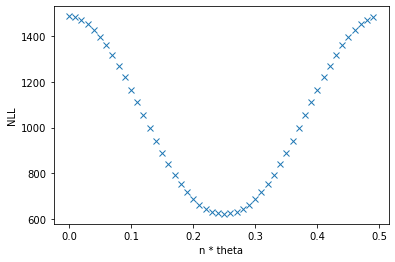

In [46]:
plot_NLL_for_theta(energy_midpoints, data, end_point= 0.5)

## parabolic minimiser

In [47]:
def get_x3(x0, x1, x2, y0, y1, y2):
  numerator = (((x2 ** 2) - (x1 ** 2)) * y0) + (((x0 ** 2) - (x2 ** 2)) * y1) + (((x1 ** 2) - x0 ** 2) * y2)
  denominator = ((x2 - x1) * y0) + ((x0 - x2) * y1) + ((x1 - x0) * y2)
  #print(numerator,denominator)
  x3 = 0.5 * numerator / denominator
  return x3

In [48]:
# x0,x1,x2 initial guesses
def parabolic_minimiser_for_theta(x0, x1, x2, m23 =  2.4e-3, min_limit = 1e-5):
  change_in_x3 = 1
  n=1

  while change_in_x3 > min_limit:
    print(n)
    #initial points
  
    y0 = likelihood_function(event_prediction(energy_midpoints,x0,m23),data)
    y1 = likelihood_function(event_prediction(energy_midpoints,x1,m23),data)
    y2 = likelihood_function(event_prediction(energy_midpoints,x2,m23),data)
    #print(y0,y1,y2)
    x3 = get_x3(x0, x1, x2, y0, y1, y2)
    change_in_x3 = abs(x2 - x3)
    #print(x0,x1,x2)
    #print(x3,change_in_x3)

    #moving up one
    x0 = x1
    x1 = x2
    x2 = x3
    n+=1
    #print(x0,x1,x2)
  return x3

In [49]:
def parabolic_minimiser_for_m23(x0, x1, x2, theta = np.pi/4, min_limit = 1e-5):
  change_in_x3 = 1
  n = 1
  while change_in_x3 > min_limit:
    #initial points
    print(n)
    y0 = likelihood_function(event_prediction(energy_midpoints,theta,x0),data)
    y1 = likelihood_function(event_prediction(energy_midpoints,theta,x1),data)
    y2 = likelihood_function(event_prediction(energy_midpoints,theta,x2),data)
    #print(y0,y1,y2)
    x3 = get_x3(x0, x1, x2, y0, y1, y2)
    change_in_x3 = abs(x2 - x3)
    #print(x0,x1,x2)
    #print(x3,change_in_x3)

    #moving up one
    x0 = x1
    x1 = x2
    x2 = x3
  
    n += 1
    #print(x0,x1,x2)
  return x3

In [50]:
parabolic_minimiser_for_theta(0.2, 0.22, 0.24)

1
2
3
4
5


0.2499999836254736

In [51]:
# to plot minimum point
minimum_x = parabolic_minimiser_for_theta(0.2, 0.22, 0.24)
minimum_y = likelihood_function(event_prediction(energy_midpoints,minimum_x,2.4e-3),data)
print(minimum_y,minimum_x)

1
2
3
4
5
622.4770339941457 0.2499999836254736


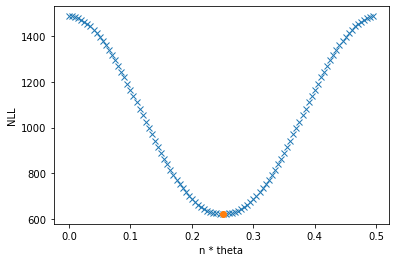

In [52]:
plot_NLL_for_theta(energy_midpoints, data, start_point= 0, end_point= 0.5, interval=0.005 )
plt.plot(minimum_x,minimum_y,'o')

## uncertainty

In [53]:
def likelihood_function_for_secant(x):
  y = likelihood_function(event_prediction(energy_midpoints,x,2.4e-3),data)
  return y

In [54]:
def SecantMethod(f, x1, x2, min_y):
    
    while abs(f(x1) - min_y) > 1e-6:
        fx1 = f(x1) - min_y
        fx2 = f(x2) - min_y
        xtemp = x1
        x1 = x1 - (x1 - x2) * fx1/ (fx1 - fx2)
        x2 = xtemp 
    return x1

In [55]:
def remove_none(array):
  for i in array:
    if i != None:
      break
  return i 

In [56]:
def get_uncertainty_for_theta(minimum_x, m23=2.4e-3):
  minimum_y = likelihood_function(event_prediction(energy_midpoints,minimum_x,m23),data)
  print(minimum_y)

  x_intercept = SecantMethod(likelihood_function_for_secant, minimum_x - 0.005, minimum_x + 0.05, minimum_y + 0.5)

  return x_intercept
  

In [57]:
get_uncertainty_for_theta(minimum_x)


622.4770339941457


0.245098251556327

# 4. two dimension

In [58]:
def plot_NLL_for_m23(energy_midpoints, data):
  m23 = np.arange(0.5e-3, 10e-3, 0.01e-3)
  NLL = []

  for n in m23:
    expected_number_of_events = event_prediction(energy_midpoints,np.pi/4,n)
    NLL.append(likelihood_function(expected_number_of_events,data))

  plt.ylabel('NLL')
  plt.xlabel('m23')
  plt.plot(m23,NLL,'x')
  #return NLL, n_thetas

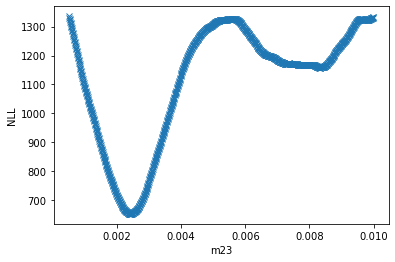

In [59]:
plot_NLL_for_m23(energy_midpoints, data)

In [60]:
minimum_x_m23 = parabolic_minimiser_for_m23(0.5e-3, 4e-3, 2.8e-3)
minimum_y_m23 = likelihood_function(event_prediction(energy_midpoints,np.pi/4,minimum_x_m23),data)

1
2
3
4
5


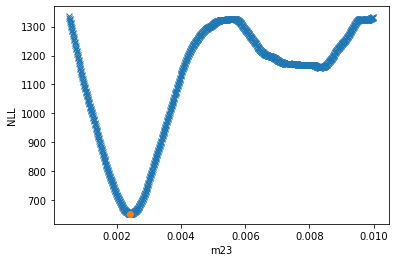

In [61]:
plot_NLL_for_m23(energy_midpoints, data)
plt.plot(minimum_x_m23,minimum_y_m23,'o')

# univariate method

In [62]:
def univariate_method(theta_array, m23_array, theta = np.pi/4, m23 = 2.1e-3):
  x0_theta = theta_array[0]
  x1_theta = theta_array[1]
  x2_theta = theta_array[2]

  x0_m23 = m23_array[0]
  x1_m23 = m23_array[1]
  x2_m23 = m23_array[2]

  change_in_min_theta = 1
  change_in_min_m23 = 1

  min_theta_initial = parabolic_minimiser_for_theta(x0_theta, x1_theta, x2_theta, m23=m23)
  min_m23_initial = parabolic_minimiser_for_m23(x0_m23, x1_m23, x2_m23, theta=theta)

  n = 1


  while change_in_min_theta > 0.001 and change_in_min_m23 > 0.001:
    print(n)
    min_theta = parabolic_minimiser_for_theta(x0_theta, x1_theta, x2_theta, m23 = min_m23_initial)
    min_m23 = parabolic_minimiser_for_m23(x0_m23, x1_m23, x2_m23, theta = min_theta_initial)

    change_in_min_theta = abs(min_theta - min_theta_initial)
    change_in_min_m23 = abs(min_m23 - min_m23_initial)
    print(change_in_min_m23)

    min_m23_initial = min_theta
    min_m23_initial = min_m23
    n += 1


  
  return min_theta, min_m23
    

    

In [63]:
initial_guess_theta = [0.2, 0.22, 0.24]
initial_guess_m23 = [2.0e-3, 2.2e-3, 2.8e-3]

univariate_method(initial_guess_theta,initial_guess_m23)

1
2
3
4
5
1
2
1
1
2
3
4
5
1
2
3
4
5
1.2503355741364398e-05


(0.2499999795315626, 0.002418691723776154)

## gradient descent

In [94]:
def numerical_derivative(theta, m23, h, for_theta = True):
  if for_theta == True:
    grad = likelihood_function(event_prediction_but_no_n(energy_midpoints, theta + h, m23),data) - likelihood_function(event_prediction_but_no_n(energy_midpoints, theta, m23),data)
  else:
    grad = likelihood_function(event_prediction(energy_midpoints, theta, m23 + h),data) - likelihood_function(event_prediction(energy_midpoints, theta, m23),data)
  return grad / h

In [135]:
def gradient_method(initial_points, h_theta, h_m23, alpha, num_iterate):


  for i in range(num_iterate):
    initial_theta = initial_points[0]
    initial_m23 = initial_points[1]
    print(initial_theta)
    gradient = np.array([numerical_derivative(initial_theta, initial_m23, h_theta, for_theta = True), numerical_derivative(initial_theta, initial_m23, h_m23, for_theta = False)])
    new_vector = initial_points - (alpha * gradient)
    print(i)
    if likelihood_function(event_prediction_but_no_n(energy_midpoints, new_vector[0], new_vector[1]),data) > likelihood_function(event_prediction_but_no_n(energy_midpoints, initial_points[0], initial_points[1]),data):
      break
    else:
      initial_points = new_vector
  return new_vector


In [140]:
gradient_method([np.pi/4.4, 2.7e-3], 1e-8, 1e-8, 1e-10, 200)

0.7139983303613165
0
0.7139983560101734
1
0.7139983824772695
2
0.7139984094227975
3
0.7139984366302757
4
0.7139984642315652
5
0.7139984925948885
6
0.7139985219176251
7
0.7139985521500988
8
0.7139985831503552
9
0.7139986147808813
10
0.7139986469330549
11
0.7139986795252773
12
0.7139987124961109
13
0.7139987457979916
14
0.7139987793926477
15
0.7139988132477466
16
0.7139988473345951
17
0.7139988816266448
18
0.7139989160984994
19
0.7139989507255389
20
0.7139989854838571
21
0.713999020350678
22
0.713999055304724
23
0.7139990903267569
24
0.7139991253999137
25
0.7139991605099222
26
0.7139991956451145
27
0.7139992307962184
28
0.7139992659561422
29
0.7139993011196015
30
0.7139993362828211
31
0.7139993714432155
32
0.7139994065990977
33
0.7139994417494706
34
0.7139994768938351
35
0.7139995120320436
36
0.7139995471641982
37
0.7139995822905605
38
0.7139996174114783
39
0.713999652527361
40
0.713999687638637
41
0.7139997227457475
42
0.7139997578491007
43
0.7139997929490957
44


array([0.71399983, 0.00241739])

## 2d plot

In [64]:
import seaborn as sb
from findpeaks import findpeaks

def plot_NLL_for_2d(energy_midpoints, data, start_point=0, end_point = 5, interval = 0.01):
  n_thetas = np.arange(start_point,end_point, interval)
  m23 = np.arange(0.5e-3, 5e-3, 0.01e-3)
  
  NLL = []

  for n in n_thetas:
    NLL_before = []
    for i in m23:
      expected_number_of_events = event_prediction(energy_midpoints, n, i)
      NLL_before.append(likelihood_function(expected_number_of_events,data))
    NLL.append(NLL_before)

  #print(NLL)
  #plt.ylabel('NLL')
  #plt.xlabel('n * theta')
  #sb.heatmap(NLL)
  #plt.imshow(NLL)
  #return NLL

  fp = findpeaks(method='mask')
  # Fit
  fp.fit(NLL)
  fp.plot_mesh()

  # plt.contour(m23,n_thetas,NLL,colors=['#808080', '#A0A0A0', '#C0C0C0'])
  # plt.xlabel('m23')
  # plt.ylabel('theta')

/Users/afyqeyzar/opt/anaconda3/lib/python3.8/site-packages/scipy/__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.4)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


[findpeaks] >Finding peaks in 2d-array using mask method..
[findpeaks] >Scaling image between [0-255] and to uint8
[findpeaks] >Conversion to gray image.
[findpeaks] >WARNING: Conversion to gray not possible.
[findpeaks] >Denoising with [fastnl], window: [3].
[findpeaks] >Detect peaks using the mask method with limit=0.
[findpeaks] >Fin.
[findpeaks] >Plotting 3d-mesh..


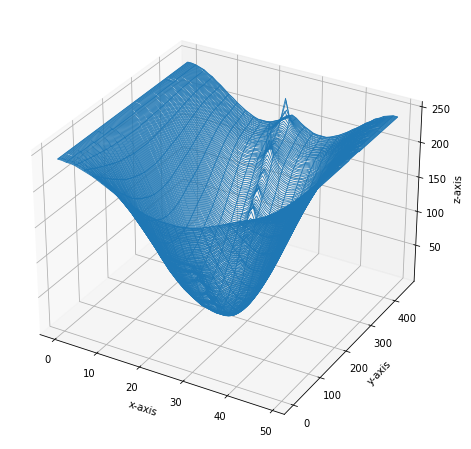

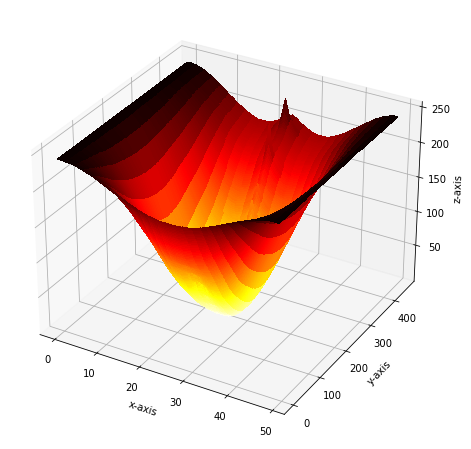

In [65]:
plot_NLL_for_2d(energy_midpoints, data, end_point= 0.5)